# Visualization of a GEOtiff file

## Imports and Installations

In [51]:
!pip install rasterio -q

In [52]:
!pip3 install scikit-image -q

In [53]:
import rasterio
from rasterio.plot import show,show_hist
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib import cm
import numpy as np
import matplotlib.transforms

## Reading and Analysing the Geotiff File

In [54]:
# Get the Geotiff file from a folder or url
data_tif_path = 'djf-2001.tif'

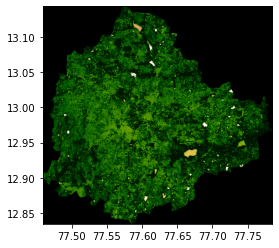

<AxesSubplot:>

In [55]:
# Open and visualize the Geotiff file with rasterio
ds = rasterio.open(data_tif_path)
show(ds)
## TODO - Get the distance information from the file and check if any more usuable properties are available

In [56]:
# Check the number of bands in the tiff file by the ds.count command and we can read each band seperatly.
# Here the band indexing starts from 1.
b1 = ds.read(1)
b2 = ds.read(2)
b3 = ds.read(3)

## Helper Functions

In [57]:
def image_convert(data_numpy):
   
    # Converted the black background value to nan data
    image_data = np.where(data_numpy.any(0,keepdims=True),data_numpy,np.nan)
    image_data = rgb2gray(np.transpose(image_data, (1, 2, 0)))
    
    # Resampling the pixel values from -1 to 1
    image_data = ((image_data/255)*2)-1 
    return image_data

In [58]:
def map_legend():
    
    legend_items = []
    # Set the colours for the legend with the associated labels
    cmap_and_label = {'#fde725':'>1',
                      '#90d743':'>0.6 - dense vegetation',
                      '#35b779':'0.1 to 0.5 - sparse vegetation',
                      '#21918c':'-6 to 0.1 - bare soil',
                      '#31688e':'-1 to -0.6 - clouds and water',
                      '#443983':'<-1'
                     }
    # Loop over for the legend labels
    for cmap in cmap_and_label.keys():
        item = mpatches.Patch(color=cmap, label=cmap_and_label[cmap])
        legend_items.append(item)
    
    # Plot the legend with various styling parameters
    plt.legend(handles= legend_items,bbox_to_anchor=(2.2, 1), loc='upper right', borderaxespad=0, fancybox = True, title='NDVI Classes', title_fontsize = 12)


In [59]:
def map_textbox():
    x_loc = 1715
    y_loc = 900
    plt.text(x_loc, y_loc, "District = Bengaluru Urban \nSpectral Indices = NDVI\nSeason = djf\nYear = 2001") 

In [60]:
def map_plot():
    
    # Set a proper title to the map
    plt.title("NDVI Index 2001(djf)")
    # Select a colormap
    cmap = mpl.cm.viridis
    
    # We can also prepare our own custom colormap
    # cmap = colors.ListedColormap(['yellow', 'green','cyan', 'blue', 'violet', 'orange','red'])
    
    # Create discrete colorbar with custom intervals
    bounds = [-1,-0.6,0.1,0.5,1]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
    plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))
    
    # Create custom legend
    map_legend()
    
    # Create a text box for all the information
    map_textbox()

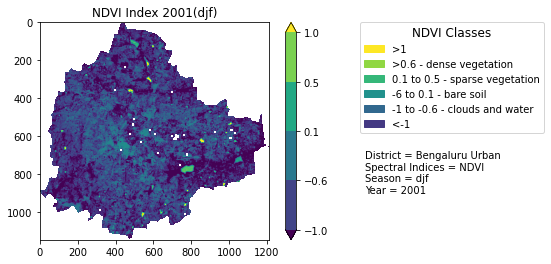

In [63]:
# read as numpy array
data_numpy = ds.read()
# Convert the numpy image to the correct format for mapping
conv_image = image_convert(data_numpy)
map_plot()

# Show the map
plt.imshow(conv_image)

#Save the map
plt.savefig('test2.jpg',format = "jpg", dpi = 150, bbox_inches ="tight")